In [1]:
import h5py
import numpy as np
import math

# Load dataset from HDF5 file
with h5py.File('data.hdf5', 'r') as f:
    X_trainval = np.array(f['trainval/images_log'])
    y_trainval = np.array(f['trainval/pv_log'])
    X_test = np.array(f['test/images_log'])
    y_test = np.array(f['test/pv_log'])

# X_trainval = X_trainval[:10000]
# y_trainval = y_trainval[:10000]

# Flatten 3D arrays to 2D arrays for training and testing
X_trainval_flat = X_trainval.reshape(X_trainval.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_trainval_flat.shape

(16435, 12288)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualise(y_pred,y_test):
    
    # Scatter plot
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title("Scatter Plot")
    plt.show()

    f = plt.figure()
    f.set_figheight(5)
    f.set_figwidth(18)

    # Line plot
    plt.plot(y_test, label='True Values')
    plt.plot(y_pred, label='Predictions')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Line Plot')
    plt.show()

    # Distribution plot
    sns.distplot(y_test, hist=False, label='True Values')
    sns.distplot(y_pred, hist=False, label='Predictions')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.title("Distribution Plot")
    plt.show()

    # Residual plot
    residuals = [true - pred for true, pred in zip(y_test, y_pred)]
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.title("Residual Plot")
    plt.show()

    # Box plot
    data = [y_test, y_pred]
    labels = ['True Values', 'Predictions']
    plt.boxplot(data, labels=labels)
    plt.ylabel('Value')
    plt.title("Box Plot")
    plt.show()

In [3]:
models_list = []
rmse_list = []
mae_list = []

# Random Forest Regressor

Root Mean squared error for Random Forest Regression: 2.1175325512845733
Mean Absolute error for Random Forest Regression: 1.2853479184223595


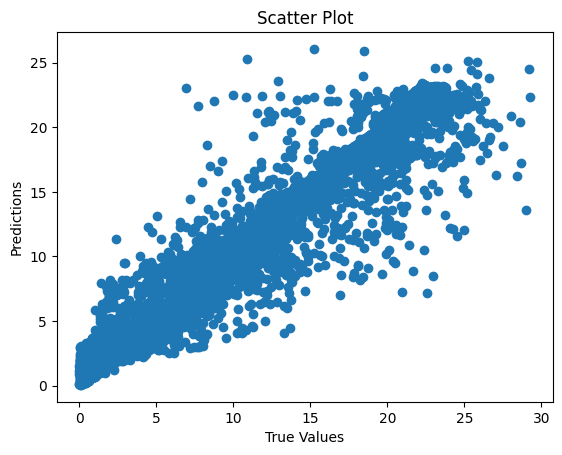

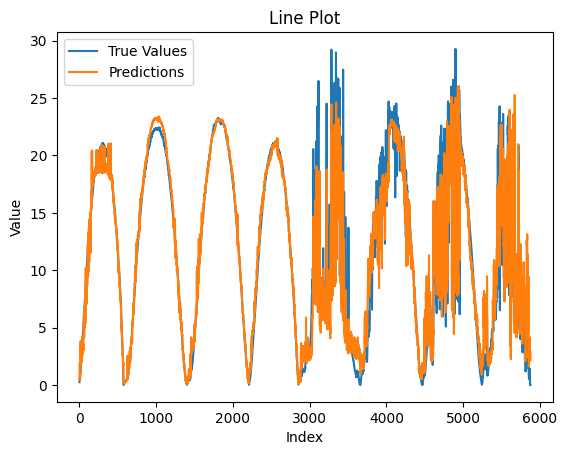

C:\Users\rakes\AppData\Local\Temp\ipykernel_15052\3891626765.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\rakes\AppData\Local\Temp\ipykernel_15052\3891626765.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, h

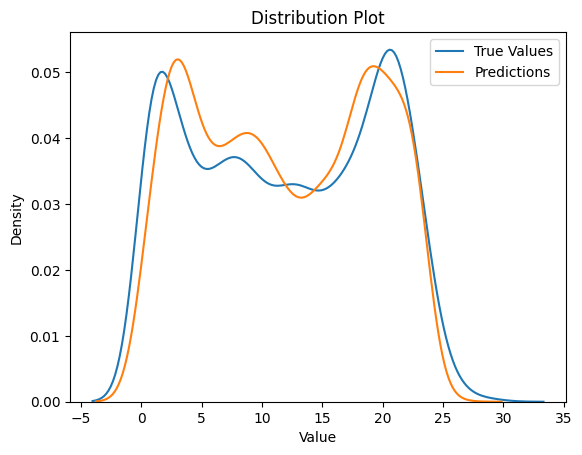

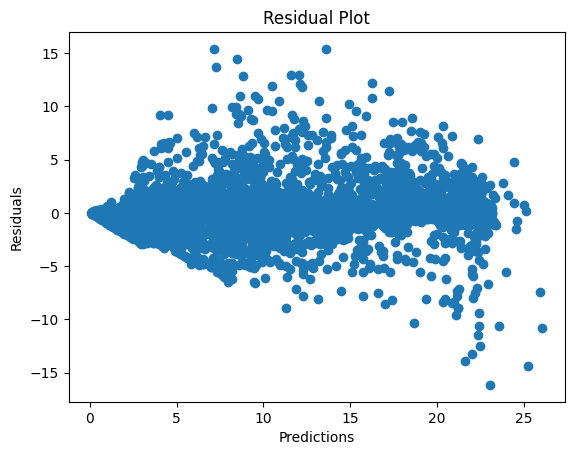

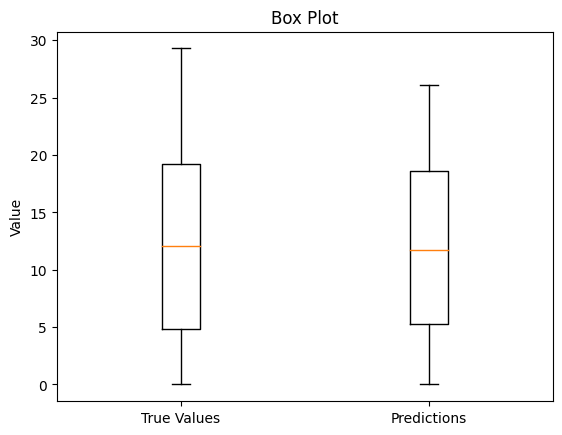

In [7]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=0)
RFR.fit(X_trainval_flat,y_trainval)

#  Predict PV values for test data
y_pred = RFR.predict(X_test_flat)


# Evaluate model accuracy on test data
rmse = math.sqrt(((y_pred - y_test) ** 2).mean())
mae = (abs(y_pred-y_test)).mean()
print('Root Mean squared error for Random Forest Regression:', rmse)
print('Mean Absolute error for Random Forest Regression:', mae)


visualise(y_pred,y_test)    

models_list.append("RFC")
rmse_list.append(rmse)
mae_list.append(mae)

# Gradient Boosting Regressor

Root Mean squared error for Gradient Boosting Regression: 2.2679817083152893
Mean Absolute error for Gradient Boosting Regression: 1.4500079121919462


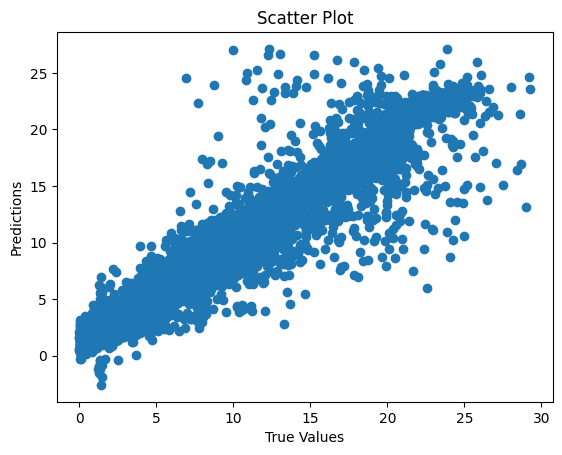

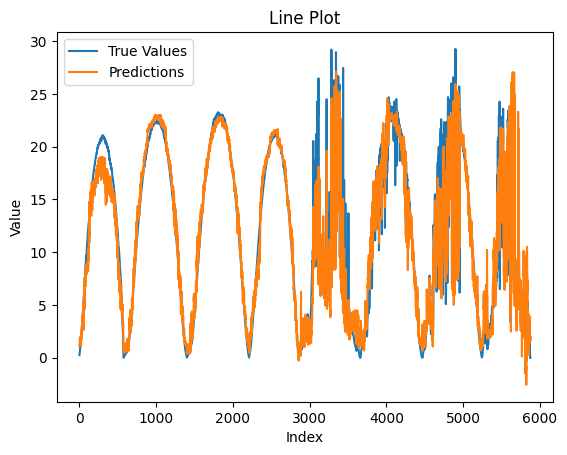

C:\Users\rakes\AppData\Local\Temp\ipykernel_15052\3891626765.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\rakes\AppData\Local\Temp\ipykernel_15052\3891626765.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, h

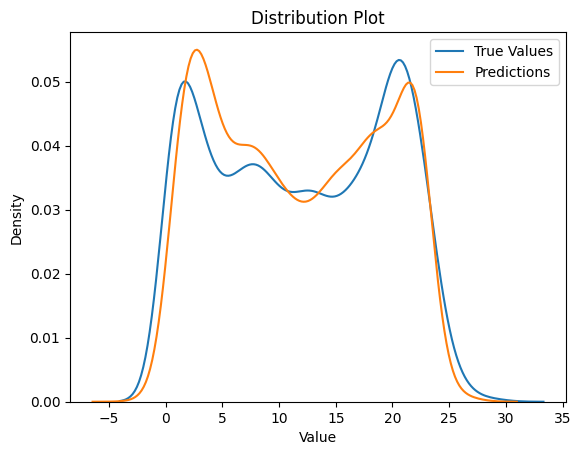

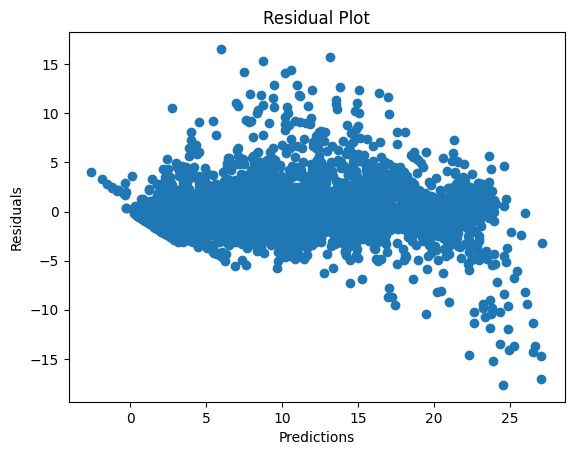

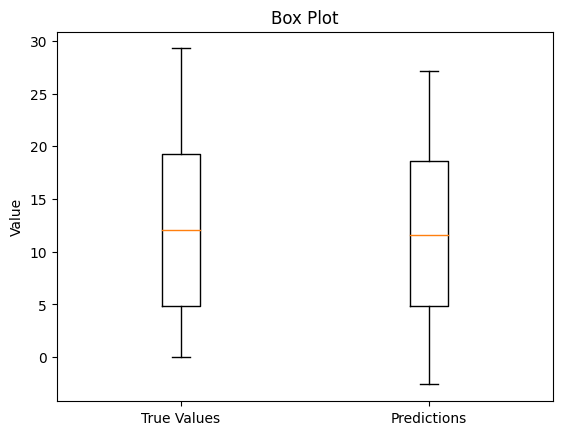

In [6]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=0)
GBR.fit(X_trainval_flat,y_trainval)

#  Predict PV values for test data
y_pred = GBR.predict(X_test_flat)


# Evaluate model accuracy on test data
rmse = math.sqrt(((y_pred - y_test) ** 2).mean())
mae = (abs(y_pred-y_test)).mean()
print('Root Mean squared error for Gradient Boosting Regression:', rmse)
print('Mean Absolute error for Gradient Boosting Regression:', mae)


visualise(y_pred,y_test)

models_list.append("GBR")
rmse_list.append(rmse)
mae_list.append(mae)

# Multi-Layer Perceptron 

Root Mean squared error for MLP Regression: 29.021008258731992
Mean Absolute error for MLP Regression: 28.77260454615411


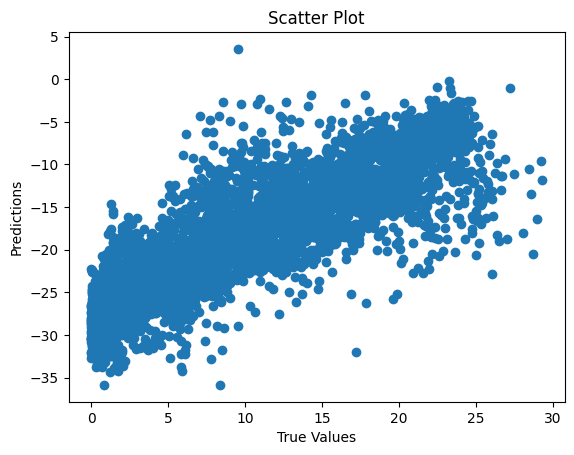

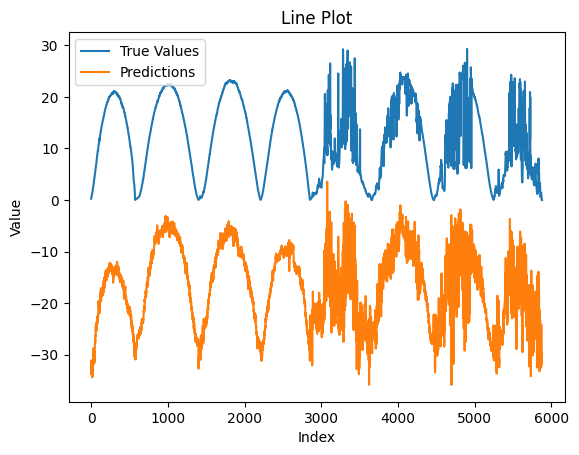

C:\Users\rakes\AppData\Local\Temp\ipykernel_15052\3891626765.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\rakes\AppData\Local\Temp\ipykernel_15052\3891626765.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, h

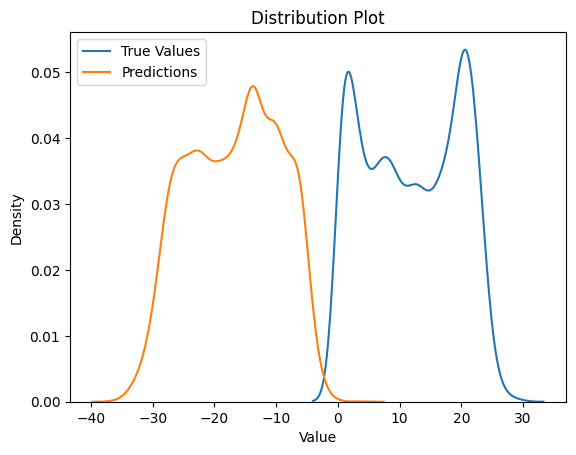

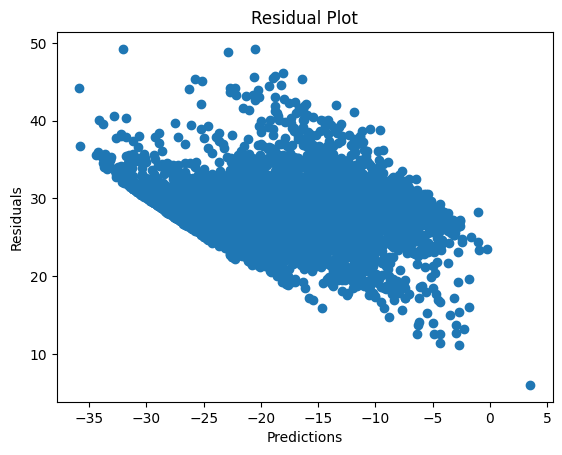

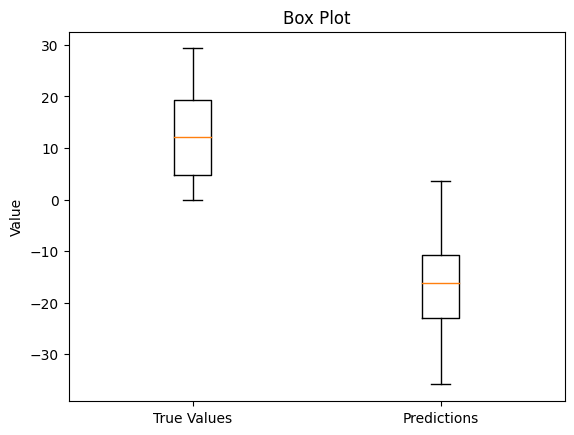

In [9]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
MLP.fit(X_trainval_flat, y_trainval)

#  Predict PV values for test data
y_pred = MLP.predict(X_test_flat)


# Evaluate model accuracy on test data
rmse = math.sqrt(((y_pred - y_test) ** 2).mean())
mae = (abs(y_pred-y_test)).mean()
print('Root Mean squared error for MLP Regression:', rmse)
print('Mean Absolute error for MLP Regression:', mae)



visualise(y_pred,y_test)

models_list.append("MLP")
rmse_list.append(rmse)
mae_list.append(mae)

# Convolutional Neural Networks (CNN)

Epoch 1/10
514/514 [==============================] - 119s 228ms/step - loss: 42.1768 - mse: 42.1768 - val_loss: 5.6835 - val_mse: 5.6835
Epoch 2/10
514/514 [==============================] - 118s 229ms/step - loss: 3.1034 - mse: 3.1034 - val_loss: 5.8862 - val_mse: 5.8862
Epoch 3/10
514/514 [==============================] - 94s 182ms/step - loss: 2.4198 - mse: 2.4198 - val_loss: 4.9234 - val_mse: 4.9234
Epoch 4/10
514/514 [==============================] - 98s 190ms/step - loss: 1.9275 - mse: 1.9275 - val_loss: 6.5956 - val_mse: 6.5956
Epoch 5/10
514/514 [==============================] - 101s 197ms/step - loss: 1.8537 - mse: 1.8537 - val_loss: 4.8609 - val_mse: 4.8609
Epoch 6/10
514/514 [==============================] - 100s 195ms/step - loss: 1.6641 - mse: 1.6641 - val_loss: 4.2057 - val_mse: 4.2057
Epoch 7/10
514/514 [==============================] - 90s 175ms/step - loss: 1.4607 - mse: 1.4607 - val_loss: 4.6201 - val_mse: 4.6201
Epoch 8/10
514/514 [=============================

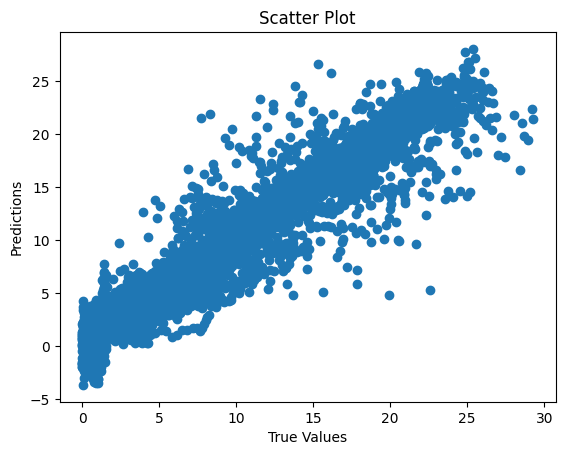

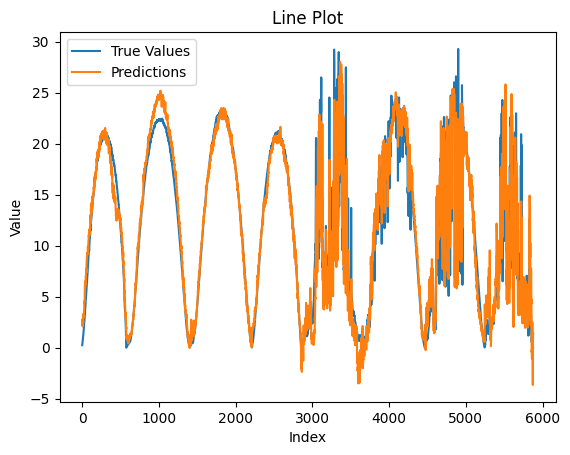

C:\Users\rakes\AppData\Local\Temp\ipykernel_2772\3891626765.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label='True Values')
C:\Users\rakes\AppData\Local\Temp\ipykernel_2772\3891626765.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, his

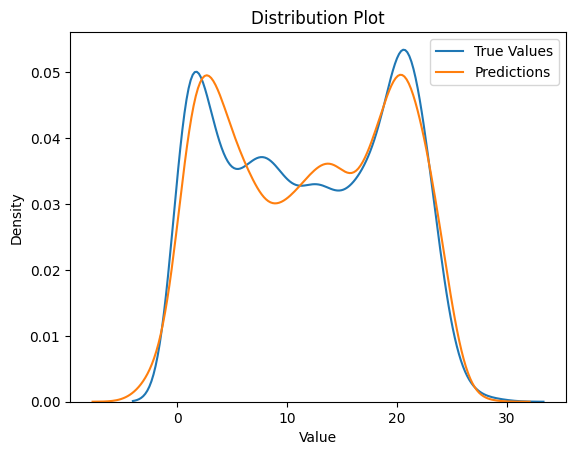

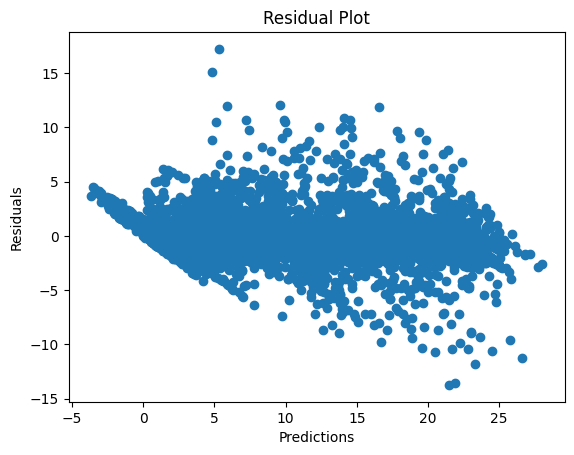

ValueError: X must have 2 or fewer dimensions

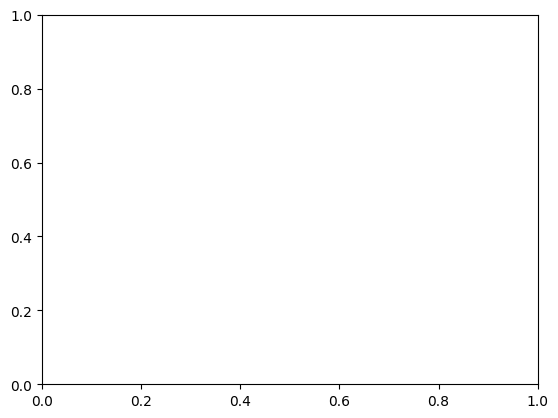

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Define the model architecture
CNN_model = Sequential()
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_trainval.shape[1:]))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(1, activation=None))

# Compile the model
CNN_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the model
CNN_model.fit(X_trainval, y_trainval, epochs=10, batch_size=32, validation_data=(X_test, y_test))

y_pred = CNN_model.predict(X_test)

# Evaluate model accuracy on test data
rmse = math.sqrt(((y_pred - y_test) ** 2).mean())
mae = (abs(y_pred-y_test)).mean()
print('Root Mean squared error for CNN :', rmse)
print('Mean Absolute error for CNN :', mae)

visualise(y_pred,y_test)

models_list.append("CNN")
rmse_list.append(rmse)
mae_list.append(mae)

# Evaluate the model
score = CNN_model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test mean squared error:', score[1])


In [8]:
print(" Model         RMSE              MAE")
print("------------------------------------------------")
for i in range(len(models_list)):
    print(models_list[i],end=" -> ")
    print(rmse_list[i],end=" , ")
    print(mae_list[i])

print(min(rmse_list))
print(min(mae_list))

 Model         RMSE              MAE
------------------------------------------------
MLP -> 9.81210417004203 , 9.022020024834719
GBR -> 2.2679817083152893 , 1.4500079121919462
RFC -> 2.1175325512845733 , 1.2853479184223595
2.1175325512845733
1.2853479184223595
